# Peyman hashemi
# 400131032

In [22]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from numpy.linalg import matrix_power
import time

In [23]:
dataset = pd.read_csv('I:\peter\AUT\semister 3\complex\EX\ca-AstroPh.txt\CA-AstroPh.csv',na_values='?', comment='#', sep='\t', skipinitialspace=True, header=None)
N1 , N2 = dataset[0].tolist() , dataset[1].tolist()
list_edges = []
for i in range(len(N1)):
  list_edges.append((N1[i], N2[i]))
graph = nx.DiGraph(list_edges)
print(nx.info(graph))


DiGraph with 18772 nodes and 396160 edges


C:\Users\Peter\AppData\Local\Temp\ipykernel_1908\1023217827.py:7: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(graph))


In [24]:
def graph_maker(graph, n_r, p):
    d_list = []

    for i in range(n_r):
        digraph = nx.DiGraph()
        digraph.add_nodes_from(list(graph.nodes))

        for edge in (list(graph.edges)):
            if np.random.uniform(0, 1, 1)[0] < p:
              digraph.add_edge(edge[0],edge[1])

        d_list.append(digraph)
    return d_list

In [25]:
list_r = graph_maker(graph , 10 , 0.01)
for l in list_r :
  print(nx.info(l))

DiGraph with 18772 nodes and 3851 edges
DiGraph with 18772 nodes and 3997 edges
DiGraph with 18772 nodes and 3952 edges
DiGraph with 18772 nodes and 3908 edges
DiGraph with 18772 nodes and 4022 edges
DiGraph with 18772 nodes and 4032 edges
DiGraph with 18772 nodes and 4090 edges
DiGraph with 18772 nodes and 4066 edges
DiGraph with 18772 nodes and 3890 edges
DiGraph with 18772 nodes and 4087 edges


C:\Users\Peter\AppData\Local\Temp\ipykernel_1908\2386865398.py:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(l))


In [29]:
def IC(graph_list, S):
    spread = []
    for i in range(len(graph_list)):
        current_ndoe, A = S[:], S[:]
        graph = graph_list[i]

        while current_ndoe:
            new_nodes = []
            for node in current_ndoe:
                new_nodes +=  list(set(graph.neighbors(node)))

            current_ndoe  = list(set(new_nodes) - set(A))
            A += current_ndoe

        spread.append(len(A))

    return np.mean(spread)

In [30]:
def greedy_hill_climbing(list_of_graph, k):
    S, spread, timelapse, start_time = [], [], [], time.time()
    # Find k nodes with largest marginal gain

    for i in range(k):
        best_spread = 0

        for j in set(list_of_graph[0].nodes) - set(S):
            s = IC(list_of_graph, S + [j])

            if s >= best_spread:
                best_spread, node = s, j

        S.append(node)
        print("number " + str(i + 1) +" : " +str(node)+"   spread = "+str(best_spread))
        spread.append(best_spread)
        timelapse.append(time.time() - start_time)
        
    return S, spread, timelapse

In [35]:
result_greedy  = greedy_hill_climbing(list_r, 10)
print("greedy output: " + str(result_greedy[0]))

number 1 : 93504   spread = 64.0
number 2 : 35290   spread = 105.9
number 3 : 54681   spread = 138.3
number 4 : 46847   spread = 159.1
number 5 : 85740   spread = 173.5
number 6 : 8273   spread = 187.7
number 7 : 38109   spread = 201.1
number 8 : 44785   spread = 213.0
number 9 : 46572   spread = 223.7
number 10 : 77374   spread = 234.4
greedy output: [93504, 35290, 54681, 46847, 85740, 8273, 38109, 44785, 46572, 77374]


In [19]:
def celf(list_of_graph,k):  
  
    # Calculate the first iteration sorted list
    start_time = time.time() 
    marg_gain = [IC(list_of_graph,[node]) for node in list(graph.nodes)]

    # Create the sorted list of nodes and their marginal gain 
    Q = sorted(zip(list(graph.nodes),marg_gain), key=lambda x: x[1],reverse=True)

    # Select the first node and remove from candidate list
    S, spread, SPREAD = [Q[0][0]], Q[0][1], [Q[0][1]]
    Q, LOOKUPS, timelapse = Q[1:], [graph.nodes], [time.time()-start_time]
    
    # Find the next k-1 nodes using the list-sorting procedure
    
    for _ in range(1 , k):    

        check, node_lookup = False, 0
        
        while not check:
            
            # Count the number of times the spread is computed
            node_lookup += 1
            
            # Recalculate spread of top node
            current = Q[0][0]
            
            # Evaluate the spread function and store the marginal gain in the list
            Q[0] = (current,IC(list_of_graph,S+[current]) - spread)

            # Re-sort the list
            Q = sorted(Q, key = lambda x: x[1], reverse = True)

            # Check if previous top node stayed on top after the sort
            check = (Q[0][0] == current)

        # Select the next node
        spread += Q[0][1]
        S.append(Q[0][0])
        SPREAD.append(spread)
        LOOKUPS.append(node_lookup)
        timelapse.append(time.time() - start_time)

        # Remove the selected node from the list
        Q = Q[1:]

    return(S,SPREAD,timelapse,LOOKUPS)

In [32]:
result_lazy = celf(list_r, 10)
print("lazy_hill_climbing output:   " + str(result_lazy[0]))

lazy_hill_climbing output:   [93504, 35290, 54681, 46847, 85740, 8273, 38109, 44785, 67890, 77374]


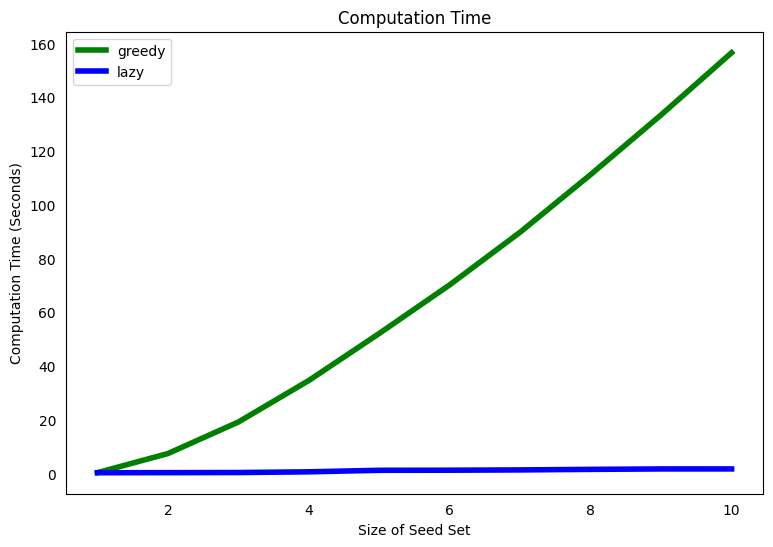

In [33]:
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False
plt.subplots()
plt.plot(range(1, len(result_greedy[2]) + 1), result_greedy[2], label="greedy", color="g")
plt.plot(range(1, len(result_lazy[2]) + 1), result_lazy[2], label="lazy", color="b")
plt.ylabel('Computation Time (Seconds)')
plt.xlabel('Size of Seed Set')
plt.title('Computation Time')
plt.legend(loc=2)